In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,PowerTransformer
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore")

In [73]:
col = [
    "state", "county", "community", "communityname", "fold",
    "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp",
    "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc",
    "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc",
    "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap",
    "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore",
    "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv",
    "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par",
    "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg",
    "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR",
    "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos",
    "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart",
    "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ",
    "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
    "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85",
    "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
    "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite",
    "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor",
    "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked",
    "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn",
    "PolicBudgPerPop", "ViolentCrimesPerPop"
]

df=pd.read_csv("communities.data",names=col,na_values=["?"])
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [74]:
df.shape

(1994, 128)

In [75]:
df.dropna(inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 16 to 1992
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(125), int64(2), object(1)
memory usage: 124.0+ KB


In [77]:
df.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

In [78]:
df.shape

(123, 128)

In [79]:
df.isnull().sum()

state                  0
county                 0
community              0
communityname          0
fold                   0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 128, dtype: int64

In [80]:
feature_columns = [
    "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp",
    "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
    "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc",
    "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc",
    "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap",
    "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore",
    "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
    "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv",
    "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par",
    "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg",
    "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10",
    "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10",
    "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
    "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
    "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR",
    "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos",
    "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart",
    "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ",
    "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
    "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85",
    "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
    "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop",
    "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite",
    "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor",
    "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked",
    "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg",
    "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn",
    "PolicBudgPerPop"
]
num_cols = df[feature_columns]
skew_values = num_cols.skew()
print(skew_values)

population             2.320499
householdsize          0.796067
racepctblack           0.938724
racePctWhite          -0.853776
racePctAsian           2.312947
                         ...   
PolicOperBudg          4.402204
LemasPctPolicOnPatr   -1.631264
LemasGangUnitDeploy    1.027250
LemasPctOfficDrugUn    0.142594
PolicBudgPerPop        3.496950
Length: 122, dtype: float64


In [81]:
for col in feature_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

In [82]:
df.isnull().sum()

state                  0
county                 0
community              0
communityname          0
fold                   0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 128, dtype: int64

In [83]:
df.dropna(inplace=True)

In [84]:
df.shape

(123, 128)

In [85]:
X=df[feature_columns]
y=df["ViolentCrimesPerPop"]
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)

In [86]:
print(X_pca)

[[ -2.39291468  -1.79466683]
 [  1.59076136  -5.12292043]
 [ -0.12430615  -4.7132535 ]
 [ -3.66624823   6.28173853]
 [  3.73838026  -2.43311301]
 [ -0.513324     3.35948519]
 [  4.66129457   1.87493874]
 [  3.16835767  -2.05722797]
 [  7.18687055  -0.32934583]
 [ -2.95949897   3.49404744]
 [ -5.87872752   9.67002051]
 [ -1.79972857   1.27154831]
 [  8.04931506   0.65528251]
 [ -8.74570824   8.36412944]
 [ -4.07215726  -2.42385333]
 [  0.69213653  -1.55061254]
 [ -6.36695748   2.62665981]
 [ -6.70093494  -3.04411839]
 [  8.10820954  -3.44409519]
 [ -0.04287191  -3.43903107]
 [  3.37235434  -0.95803684]
 [ -2.31490941  -7.90642121]
 [ -1.29723003  -7.91308604]
 [  5.03409478  -0.71849163]
 [  2.56847412  -4.43475769]
 [ -1.64608965  -7.55441781]
 [ -3.72802585  -4.01542506]
 [ -4.88465301   7.1828271 ]
 [ -8.00976462  -2.18180379]
 [-10.02674441  -1.89005468]
 [ -4.22606512   5.86446932]
 [ 11.32603868   0.72078004]
 [  6.18697596   3.2267537 ]
 [  1.36889751  -4.99778408]
 [ -4.30101303

In [87]:
print("Explained Variance:",pca.explained_variance_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured (2 components):", pca.explained_variance_ratio_.sum())

Explained Variance: [37.27255352 19.877986  ]
Explained Variance Ratio: [0.30807937 0.16430314]
Total Variance Captured (2 components): 0.472382508218767


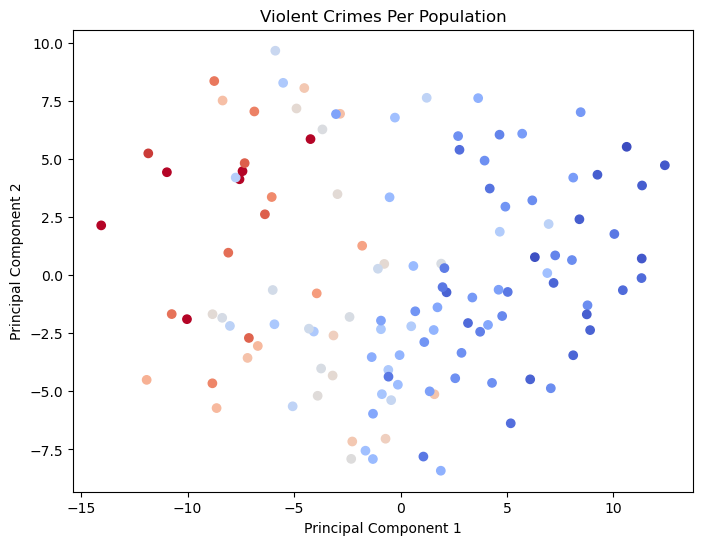

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(df["ViolentCrimesPerPop"]), cmap='coolwarm')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Violent Crimes Per Population")
plt.show()

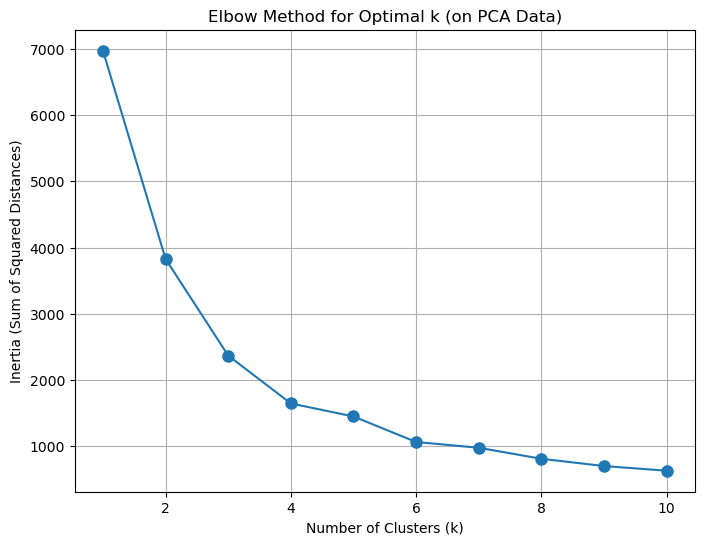

In [89]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia ,marker='o',markersize=8)
plt.title('Elbow Method for Optimal k (on PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [90]:

kmeans = KMeans(n_clusters=2, random_state=42)
labels_km = kmeans.fit_predict(X_pca)

label_counts_km = pd.Series(labels_km).value_counts()
print("Cluster label counts:")
print(label_counts_km)

sil_score = silhouette_score(X_pca,labels_km)
print(f"Silhouette Score: {sil_score:.4f}")
ari_score = adjusted_rand_score(df['ViolentCrimesPerPop'], labels_km)
print(f"Adjusted Rand Index: {ari_score:.4f}")

Cluster label counts:
0    64
1    59
Name: count, dtype: int64
Silhouette Score: 0.3817
Adjusted Rand Index: 0.0173


In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
results = []
a_grid = [2, 3, 4, 5]
for a in a_grid:
    agglo = AgglomerativeClustering(n_clusters=a)
    labs = agglo.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labs)
    results.append(sil)
agglo = AgglomerativeClustering(n_clusters=4)
a_labels = agglo.fit_predict(X_pca)
a_sil_score = silhouette_score(X_pca, a_labels)
print(f"Hierarchical Clustering Silhouette Score: {a_sil_score}")

Hierarchical Clustering Silhouette Score: 0.3964283685446031


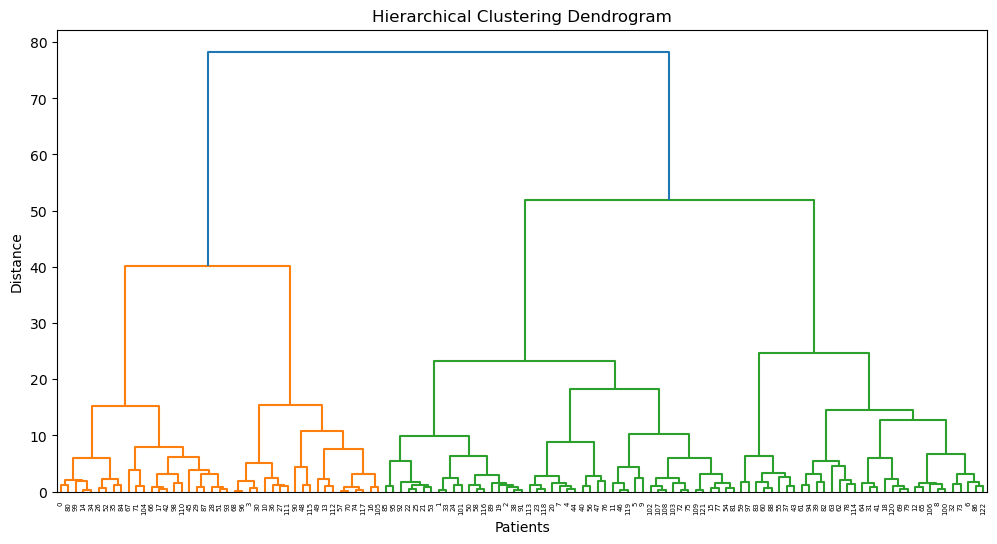

In [93]:
Z = linkage(X_pca, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()

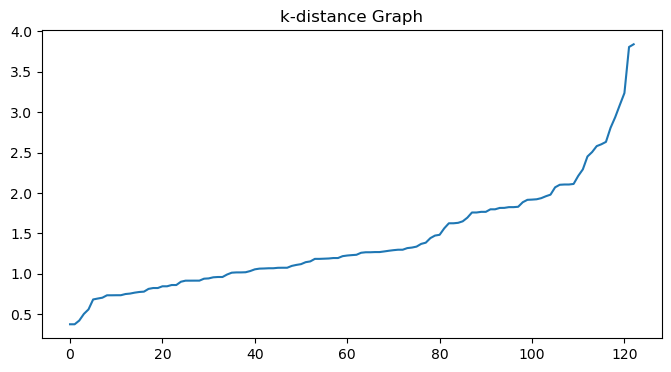

In [ ]:

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
k_distances = np.sort(distances[:, -1])
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.title('k-distance Graph')
plt.show()

In [ ]:
dbscan_grid = np.arange(0.2, 4.0, 0.2)
results = []
for eps in dbscan_grid:
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labs = dbscan.fit_predict(X_pca)
    valid = (labs != -1)
    if len(set(labs[valid])) > 1:
        sil = silhouette_score(X_pca[valid], labs[valid])
    else:
        sil = np.nan
    results.append(sil)
print(results)
dbscan = DBSCAN(eps=2.4, min_samples=3) 
labels_db = dbscan.fit_predict(X_pca)

label_counts_db = pd.Series(labels_db).value_counts()
print("Cluster label counts:")
print(label_counts_db)

mask = labels_db!= -1
if len(set(labels_db[mask])) > 1:
    print("Silhouette Score:", round(silhouette_score(X_pca[mask], labels_db[mask]), 2))
    print("Adjusted Rand Index:", round(adjusted_rand_score(df['ViolentCrimesPerPop'][mask], labels_db[mask]), 2))

[nan, nan, np.float64(0.920601610713802), np.float64(0.7335349180083524), np.float64(0.6200098442802402), np.float64(0.5412325229174773), np.float64(0.2773226019910864), np.float64(0.3641758009937317), np.float64(0.2961966859072532), np.float64(0.2667058721267681), np.float64(0.2667058721267681), np.float64(0.3492574650969248), nan, nan, nan, nan, nan, nan, nan]
Cluster label counts:
 0    98
 1    18
-1     7
Name: count, dtype: int64
Silhouette Score: 0.35
Adjusted Rand Index: 0.01
